# Notebook to segment images of flies taken in Parker Lab

## Imports

In [28]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

# skimage
from skimage import io, color, filters, morphology

## Params

In [12]:
# plot params
plt.style.use('dark_background')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

## Load images

In [67]:
# path to images
image_path = '/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12'
image_paths_full = glob.glob(os.path.join(image_path, 'IMG*.JPG'))
for pth in image_paths_full:
    print(pth)

/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0004.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0005.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0006.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0022.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0019.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0007.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0023.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0020.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0008.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0009.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0001.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0016.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0010.JPG
/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0014.JPG
/media/sam/SamData/Dropbox/Mosquit

/media/sam/SamData/Dropbox/Mosquitoes/photos/2024_07_12/IMG_0022.JPG


(-0.5, 6239.5, 4159.5, -0.5)

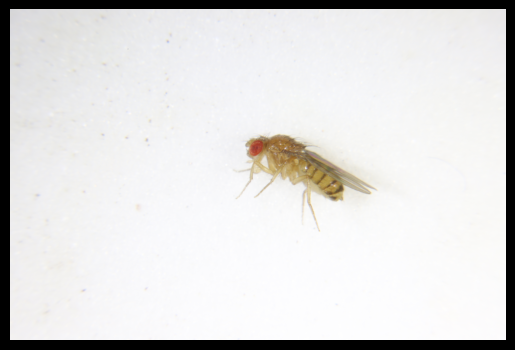

In [68]:
# load an example image
idx = 3

print(image_paths_full[idx])
im = io.imread(image_paths_full[idx])

# visualize
plt.imshow(im)
plt.axis('off')

## Try to segment using Otsu

(-0.5, 6239.5, 4159.5, -0.5)

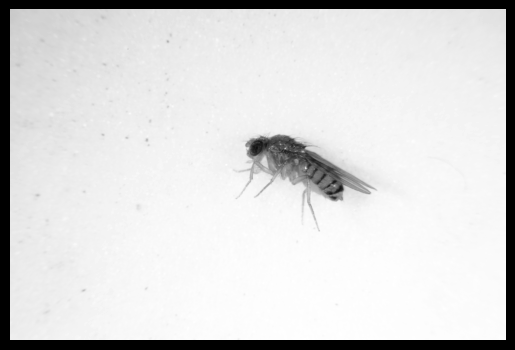

In [69]:
# convert image to grayscale
im_gray = color.rgb2gray(im)
plt.imshow(im_gray, cmap='grey')
plt.axis('off')

(-0.5, 6239.5, 4159.5, -0.5)

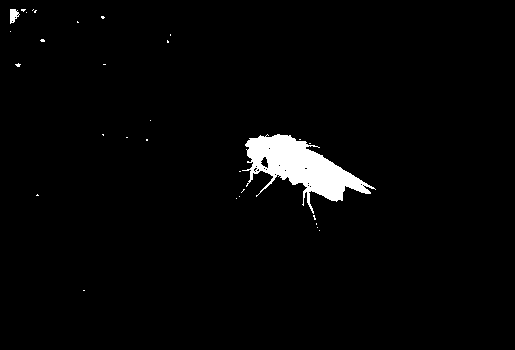

In [70]:
# otsu threshold
# thresh = filters.threshold_otsu(im_gray)
thresh = 0.85
bw = im_gray < thresh

plt.imshow(bw, cmap='grey', interpolation='none')
plt.axis('off')

(-0.5, 6239.5, 4159.5, -0.5)

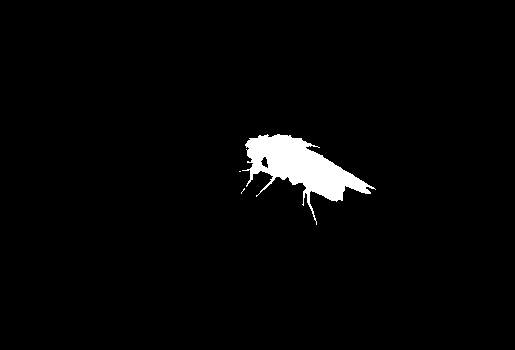

In [78]:
# process mask
bw2 = morphology.isotropic_closing(bw, 10)
bw3 = morphology.remove_small_holes(bw2, area_threshold=5000)
bw4 = morphology.remove_small_objects(bw3, min_size=50000)  #  morphology.isotropic_opening(bw, 10)

plt.imshow(bw4, cmap='grey', interpolation='none')
plt.axis('off')

(-0.5, 6239.5, 4159.5, -0.5)

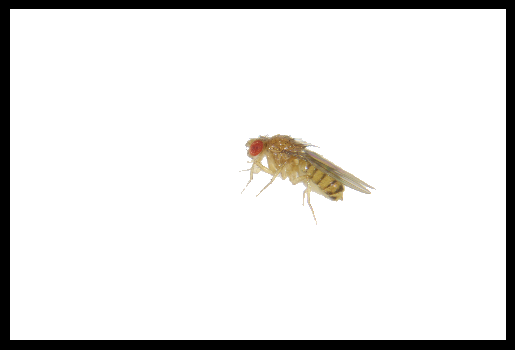

In [79]:
# try applying mask to image
im_masked = im.copy() # im * bw4[..., None]
im_masked[~bw4, :] = 255

plt.imshow(im_masked, cmap='grey', interpolation='none')
plt.axis('off')

In [83]:
# test save 
im_fn_stem = os.path.splitext(os.path.split(image_paths_full[idx])[-1])[0]
im_save_path = os.path.join(image_path, im_fn_stem + '_edit.png')
io.imsave(im_save_path, im_masked)